# Proyecto Final Programación MCD

## Martha Inés Juárez Cabrera

# Predicción de Insuficiencia Cardiaca en pacientes

## Contexto

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardiacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardiaca es un evento común causado por las ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardiaca.

Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

## Dataset

Se presenta la base de datos [`heart.csv`](https://www.kaggle.com/fedesoriano/heart-failure-prediction) extraída de la plataforma Kaggle. 

El dataset fue creado a partir de otros conjuntos de datos que se encontraban disponibles de forma independiente pero que no se habían combinado anteriormente. En este conjunto de datos, se combinan 5 conjuntos de datos cardiacos sobre 11 características comunes, lo que lo convierte en el conjunto de datos de enfermedades cardiacas más grande disponible hasta ahora para fines de investigación. Los cinco conjuntos de datos utilizados son:

* Cleveland: 303 observaciones
* Hungarian: 294 observaciones
* Switzerland: 123 observaciones
* Long Beach VA: 200 observaciones
* Stalog (Heart) Data Set: 270 observaciones

Se eliminaron las observaciones duplicadas para así obtener un total de 918 observaciones.

Los datasets mencionados anteriormente pueden ser encontrados en la siguiente página de UCI Machine Learning Repository: [heart disease datasets](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/). 


## Descripción de los datos

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


---------------------------------------------------------------------------------------------------------------

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Imputación
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#Missing data
import missingno as msno

#Para detección de outliers
from pyod.models.mcd import MCD

#Para modelos de entrenamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [2]:
#ggplot
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15,7] 

## Lectura del archivo `heart.csv`

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Análisis Exploratorio de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Como se puede observar se tiene un total de 918 registros también podemos observar variables de tipo int64 y object de las cuales ninguna tiene valores perdidos. Las variables `Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope y HeartDisease` son variables categóricas mientras que las otras variables toman valores numéricos. Procederemos a hacer una separación entre estos dos tipos de variables para obtener un mejor análisis de éstas.

In [5]:
#Listado de variables numéricas y categóricas
list_vars_num = ['Age', 'RestingBP','Cholesterol','MaxHR', 'Oldpeak']
list_vars_cat = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

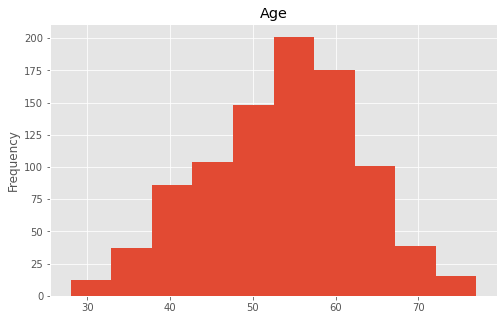

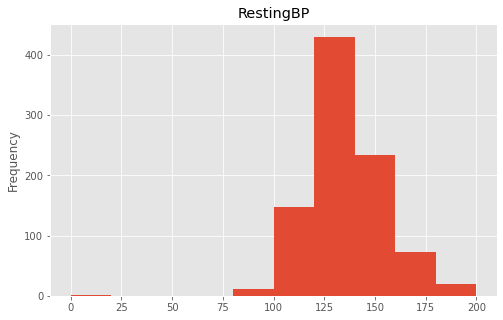

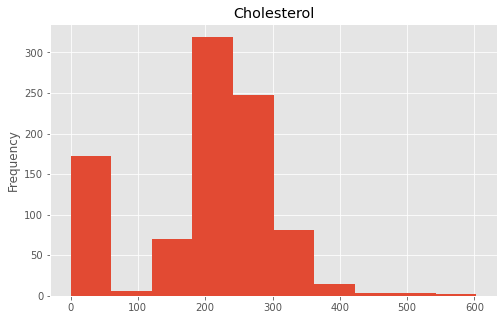

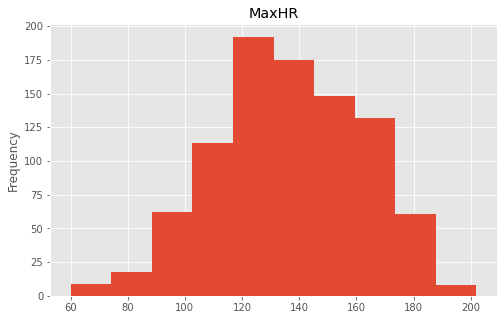

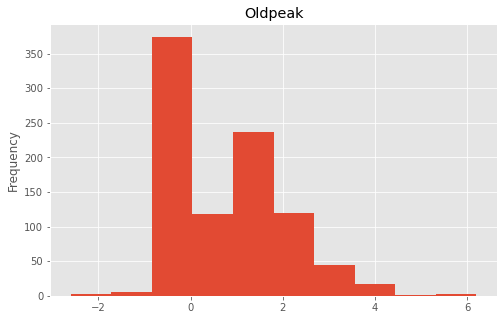

In [6]:
#Distribución de variables numéricas
columns = df.columns.tolist()
for element in list_vars_num:
    df[element].plot.hist(title=element, figsize= (8,5))
    plt.show()
    

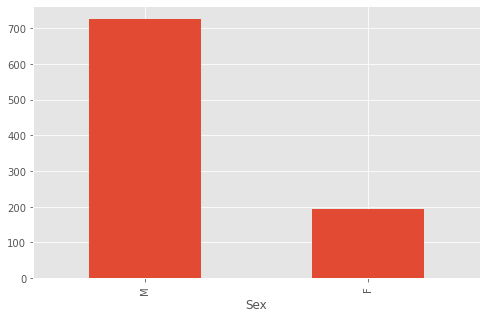

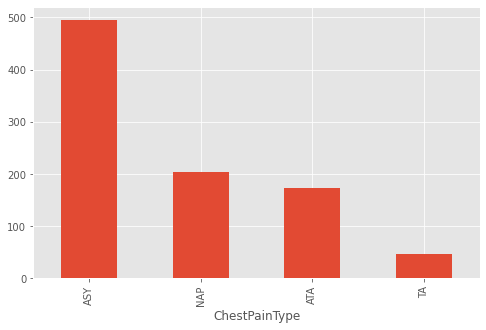

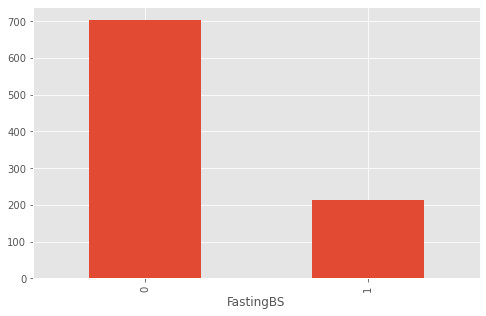

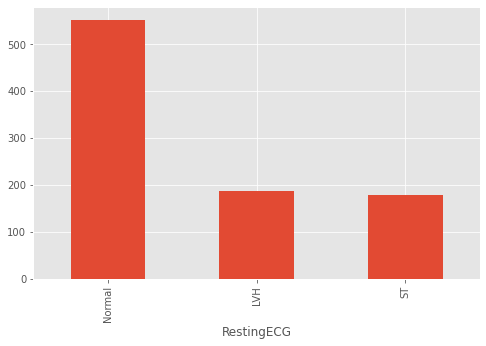

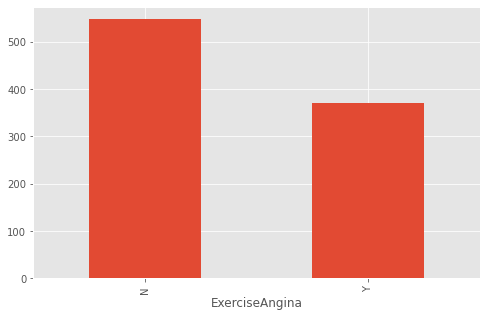

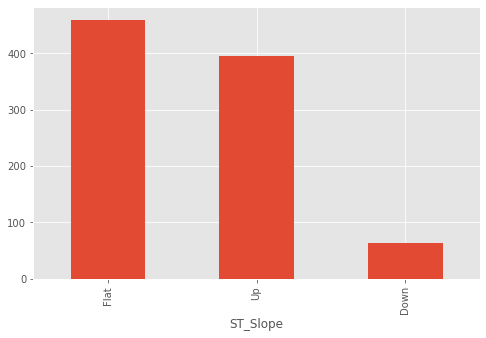

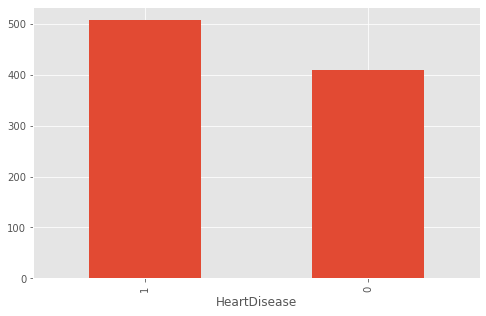

In [7]:
#Distribución de variables categóricas
for element in list_vars_cat:
    df[element].value_counts().plot(kind='bar', xlabel=element,figsize= (8,5))
    plt.show()

La mayoría de la información se obtiene de pacientes masculinos. El rango de edad de los datos obtenidos se encuentra entre los 30 y los 70 con una mayor concentración en pacientes con edad de 50 a 60 años. Podemos observar que para las variables `Cholesterol y RestingBP`se encuentran valores cero los cuales los consideraremos como nulos pues estas variables no toman valor cero en la vida real. Para a variable `Oldpeak`se observa que también se encuentran valores cero y negativos pero estos valores sí pueden obtenerse en la vida real.

In [8]:
df[df.Cholesterol == 0].head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1


Convertiremos estos valores cero en valores nulos y después realizaremos una imputación.

In [9]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].replace(0,np.nan)

In [10]:
# Se genera copia del dataframe df seleccionando algunas columnas
df_new = df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Slope'])

#Se genera la imputación 
imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
df_new = pd.DataFrame(imputer.fit_transform(df_new), columns = df_new.columns)
df_new.head()

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,HeartDisease
0,40.0,140.0,289.0,0.0,0.0,0.0
1,49.0,160.0,180.0,0.0,1.0,1.0
2,37.0,130.0,283.0,0.0,0.0,0.0
3,48.0,138.0,214.0,0.0,1.5,1.0
4,54.0,150.0,195.0,0.0,0.0,0.0


In [11]:
#Creamos una copia del dataframe y le agregamos los datos imputados
df_imp = df.copy()
df_imp['RestingBP'] = df_new['RestingBP']
df_imp['Cholesterol'] = df_new['Cholesterol']

<AxesSubplot:>

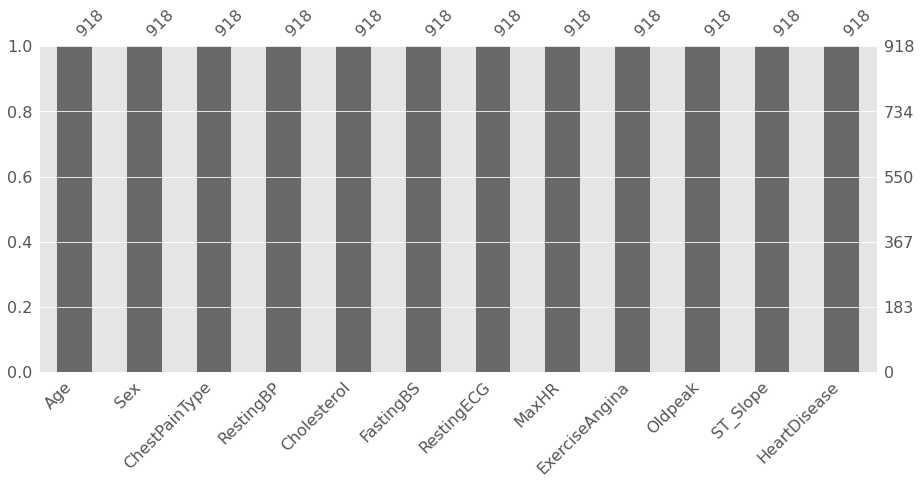

In [12]:
#Analicemos valores faltantes
fig_msno, ax_msno = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))
msno.bar(df_imp,ax = ax_msno)

Observemos que ninguna variable tiene valores nulos. Ahora procederemos a modificar la base de datos a una base de datos tidy.

### Conversión de variables de tipo no numéricas a variables numéricas

In [13]:
#Selección de columnas no numéricas
non_numeric_columns = df_imp.select_dtypes(exclude=[np.number]).columns
non_numeric_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Realizamos un reemplazo de valores para cada una de las variables categóricas.

In [14]:
# Sex
df_imp.replace('M',0, inplace = True)
df_imp.replace('F',1, inplace = True)

#ChestPainType
df_imp.replace('TA',0, inplace = True)
df_imp.replace('ATA',1, inplace = True)
df_imp.replace('NAP',2, inplace = True)
df_imp.replace('ASY',3, inplace = True)

#RestingECG
df_imp.replace('Normal',0, inplace = True)
df_imp.replace('ST',1, inplace = True)
df_imp.replace('LVH',2, inplace = True)

#ExerciseAngina
df_imp.replace('N',0, inplace = True)
df_imp.replace('Y',1, inplace = True)

#ST_Slope
df_imp.replace('Up',0, inplace = True)
df_imp.replace('Flat',1, inplace = True)
df_imp.replace('Down',2, inplace = True)

In [15]:
df_imp.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140.0,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160.0,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130.0,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138.0,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150.0,195.0,0,0,122,0,0.0,0,0


In [16]:
df_imp.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.540305,245.067538,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,17.989941,55.197940,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,211.083333,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,240.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,273.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Observemos que ahora todas las variables de nuestra base de datos se han transformados a datos numéricos.

<AxesSubplot:>

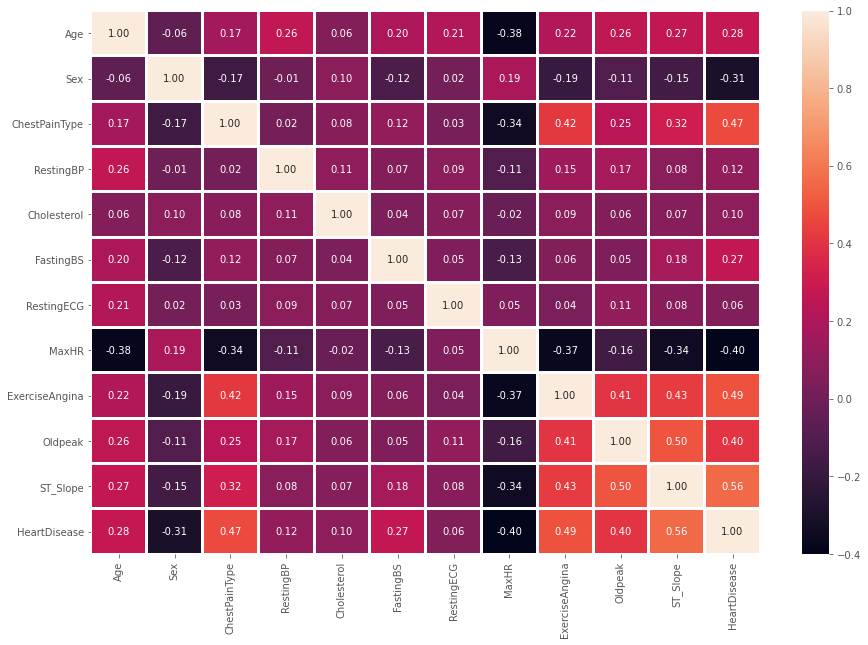

In [17]:
#Gráfica de correlaciones
plt.figure(figsize=(15,10))
sns.heatmap(df_imp.corr(method = 'pearson'), annot=True, fmt='.2f', linewidths=2)

Podemos observar que entre las variables ST_Slope y HeartDisease se presenta una correlación de 0.56. Entre las variables ST_Slope y Oldepeal se presenta una correlación de 0.50.

Ahora presentemos la distribución entre cada una de las variables:

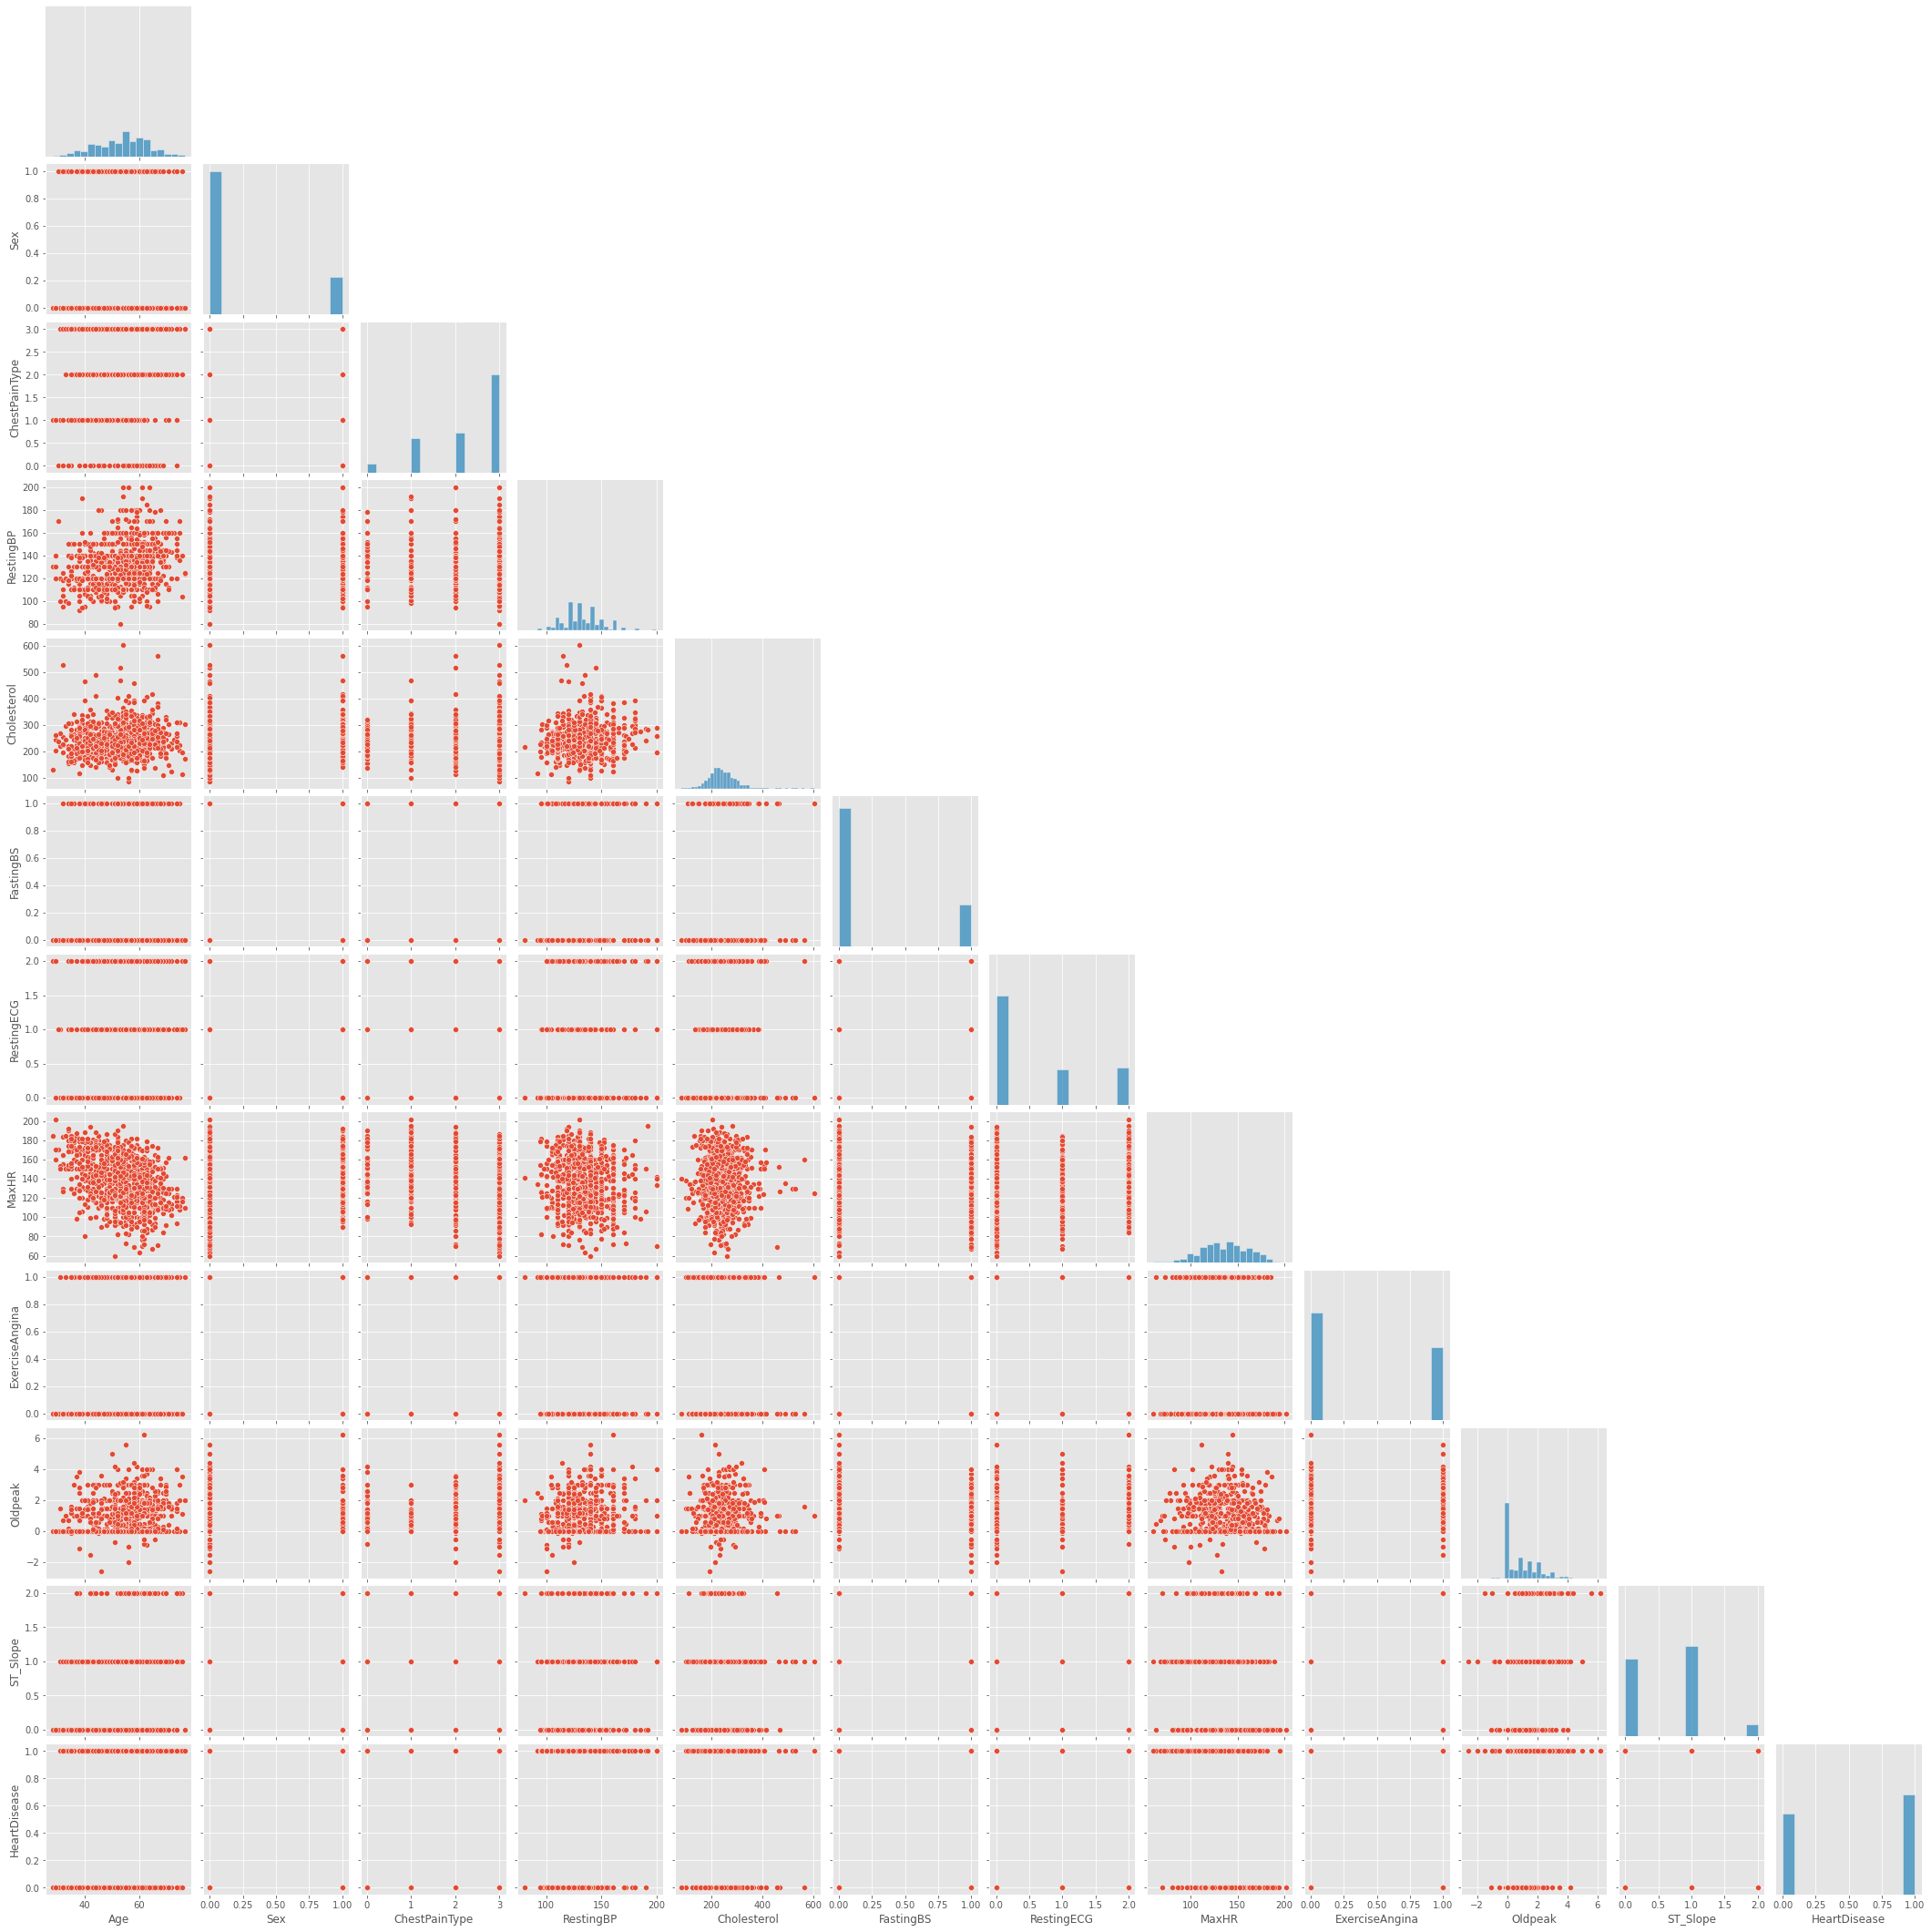

In [18]:
#Distribución entre variables en scatter plot
sns.pairplot(data=df_imp, kind = 'scatter', corner=True, diag_kind='hist')

## Visualización de Outliers

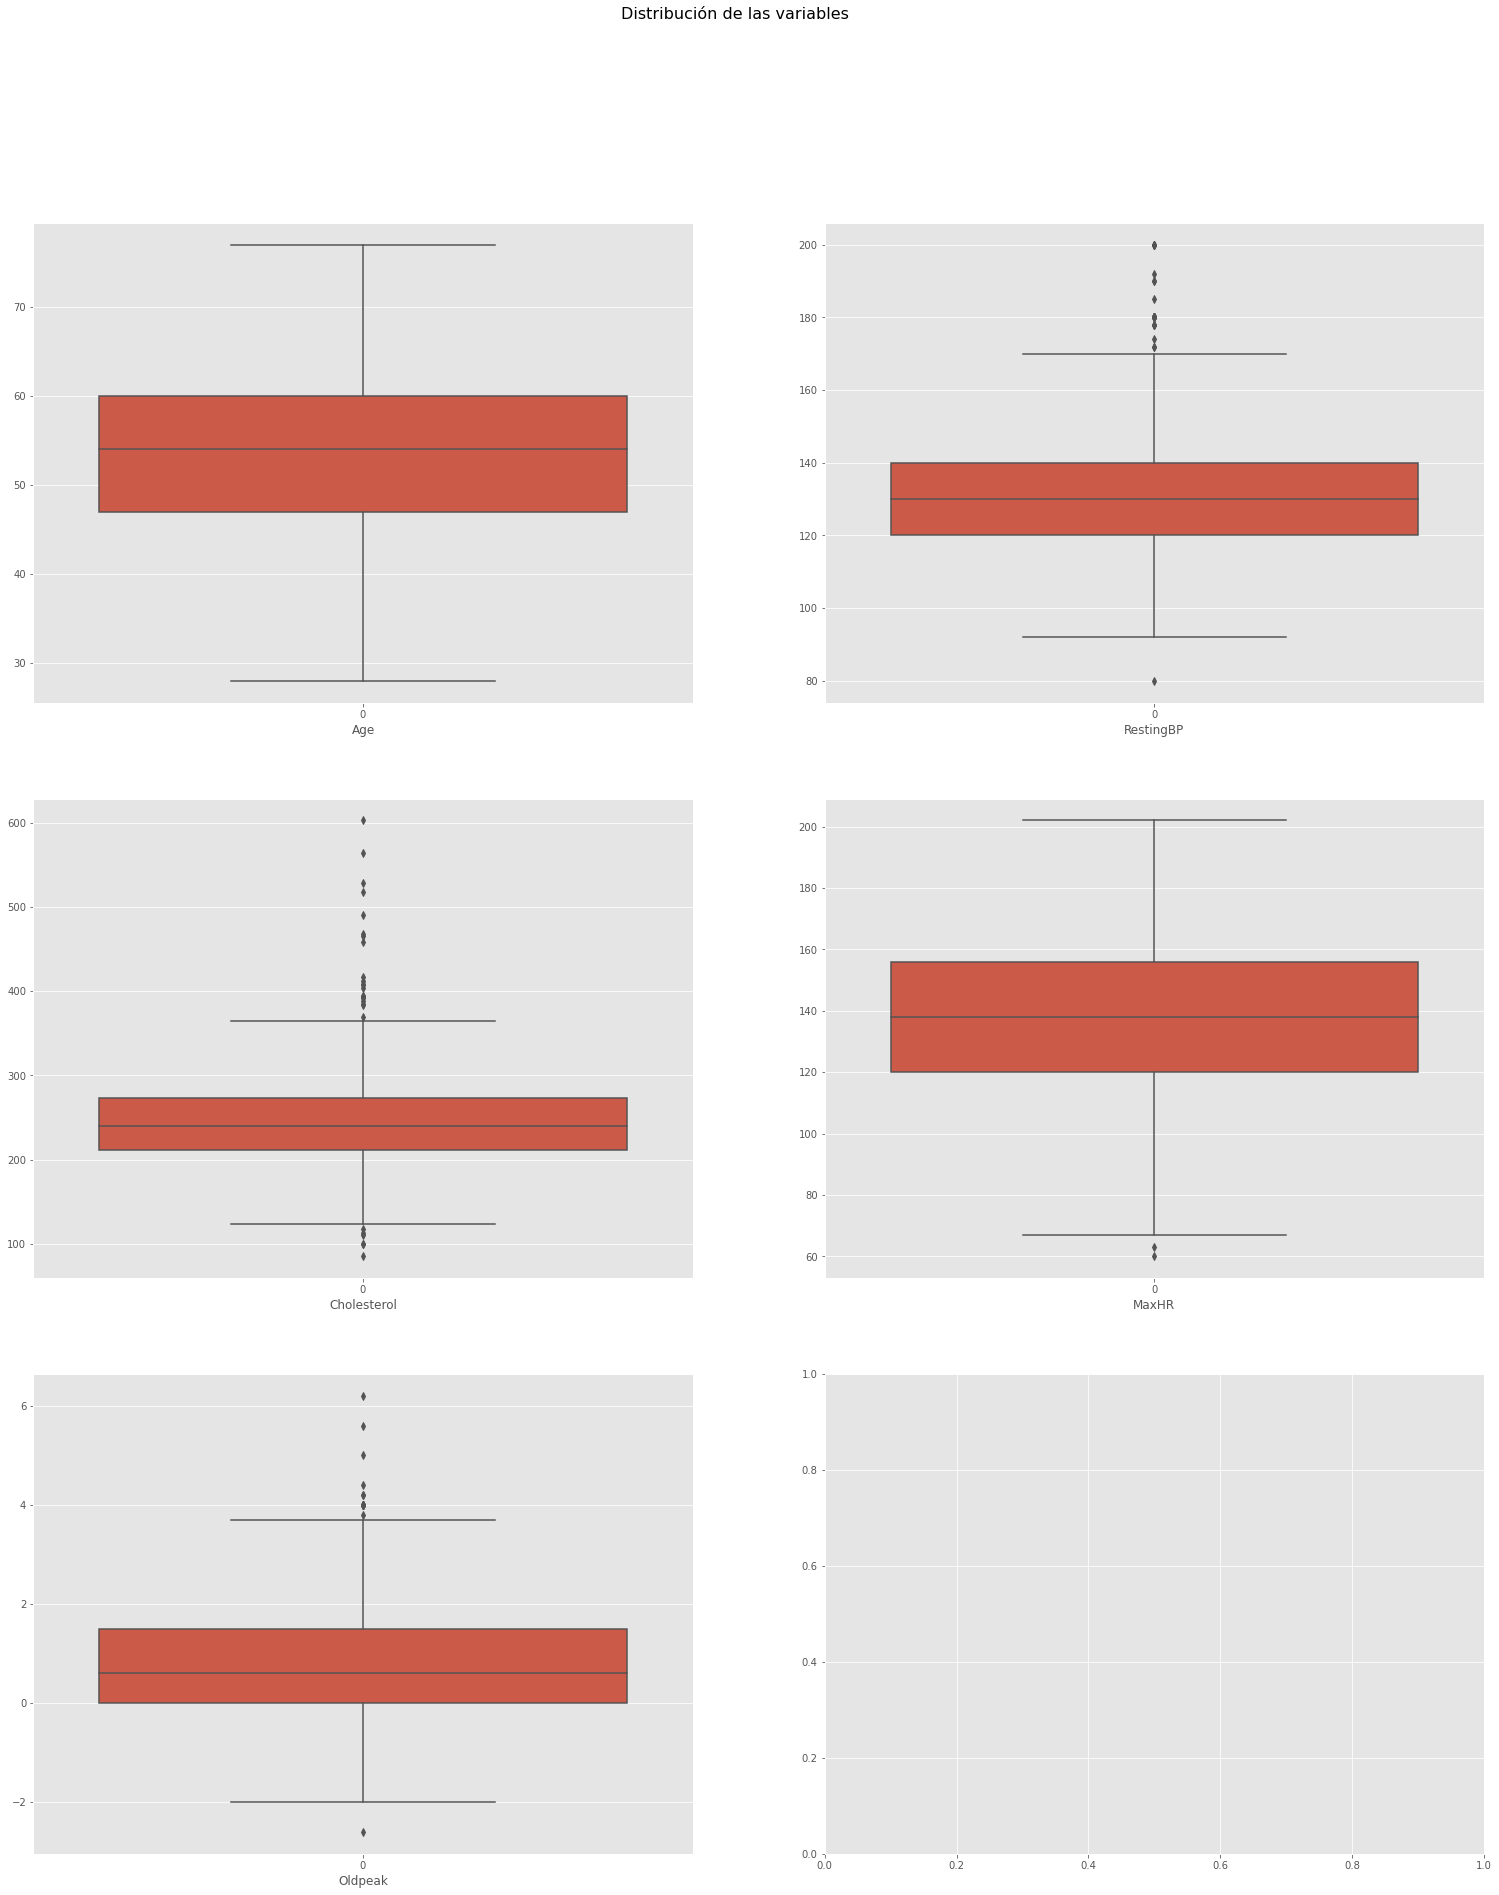

In [19]:
# Visualización de outliers para las variables list_vars_num
cols = int(len(list_vars_num)/2)
fig_boxplot, axs_boxplot = plt.subplots(nrows=3, ncols=cols, figsize = (26,30))
fig_boxplot.suptitle('Distribución de las variables', fontsize=16)
i, j = 0,0
for var in list_vars_num:
    sns.boxplot(data = df_imp[var], ax = axs_boxplot[j,i])
    axs_boxplot[j,i].set_xlabel(var)
    if i >= cols-1:
        i = 0
        j +=1
    else:
        i +=1

Se puede observar que algunas variables presentan varias anomalías para resolver esto realizaremos lo siguiente:

## Deteccion de Outliers

Se define un función `MCD_Outlier` que detecte outliers mediante el método de Minimum Covariance Determinant.

In [20]:
def MCD_outlier(df, contamination):
    
    '''
    Función que ejecuta el algoritmo de detección de outliers (Multivariado) mediante el método
    Minimum Covariance Determinant.
    
    Parámetros:
        df: DataFrame 
        contamination: Proporción de datos del df considerados como outliers
    
    Return:
    Array con dos posibles valores 0: inliers - 1: Outliers
    
    '''
    
    try:
        # Entrenamiento de MCD
        clf_name = 'MCD'
        clf = MCD(contamination=contamination)
        clf.fit(df)

        # Obtener etiquetas predichas y scores de outliers de la data de entrenamiento
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        # Predicción con PV de entrada
        y_test_pred = clf.predict(df)  # Etiqueta de outliers (0 or 1)
        y_test_scores = clf.decision_function(df)  # outlier scores

        count = 0
        for i in y_test_pred:
            count += i
            
        # Cantidad de outliers detectados en la Data
        count, y_test_pred
    except Exception as e:
        print(e) 
    
    return y_test_pred

Apliquemos la función definida anteriormente a nuestro data frame con valores imputados.

In [21]:
Outlier_Det = MCD_outlier(df_imp,contamination=0.05)
y_outlier = pd.Series(Outlier_Det, index = np.arange(len(Outlier_Det)), name = 'Outlier_Det')
df_MCD = pd.concat([df_imp, y_outlier], axis = 1)
df_MCD.head(5)

/home/martha/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.708281543175667 > -27.918539845507876). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn("Determinant has increased; this should not happen: "
/home/martha/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.693356349751767 > -27.892837633070592). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn("Determinant has increased; this should not happen: "
/home/martha/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.650762023790406 > -27.95

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Outlier_Det
0,40,0,1,140.0,289.0,0,0,172,0,0.0,0,0,0
1,49,1,2,160.0,180.0,0,0,156,0,1.0,1,1,0
2,37,0,1,130.0,283.0,0,1,98,0,0.0,0,0,0
3,48,1,3,138.0,214.0,0,0,108,1,1.5,1,1,0
4,54,0,2,150.0,195.0,0,0,122,0,0.0,0,0,0


In [22]:
# Se define la variable categorica CAT_Outlier_MCD
df_MCD["CAT_Outlier_MCD"] = df_MCD["Outlier_Det"].apply(lambda s: 'Outlier' if s == 1 else "Inlier")
df_MCD.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Outlier_Det,CAT_Outlier_MCD
0,40,0,1,140.0,289.0,0,0,172,0,0.0,0,0,0,Inlier
1,49,1,2,160.0,180.0,0,0,156,0,1.0,1,1,0,Inlier
2,37,0,1,130.0,283.0,0,1,98,0,0.0,0,0,0,Inlier
3,48,1,3,138.0,214.0,0,0,108,1,1.5,1,1,0,Inlier
4,54,0,2,150.0,195.0,0,0,122,0,0.0,0,0,0,Inlier


Calculemos el número de outliers detectados:

In [23]:
#Cantidad de Outliers encontrados
len(df_MCD[df_MCD.CAT_Outlier_MCD == 'Outlier'])

46

Analicemos la matriz de dispersión de algunas variables considerando outliers e inliers.

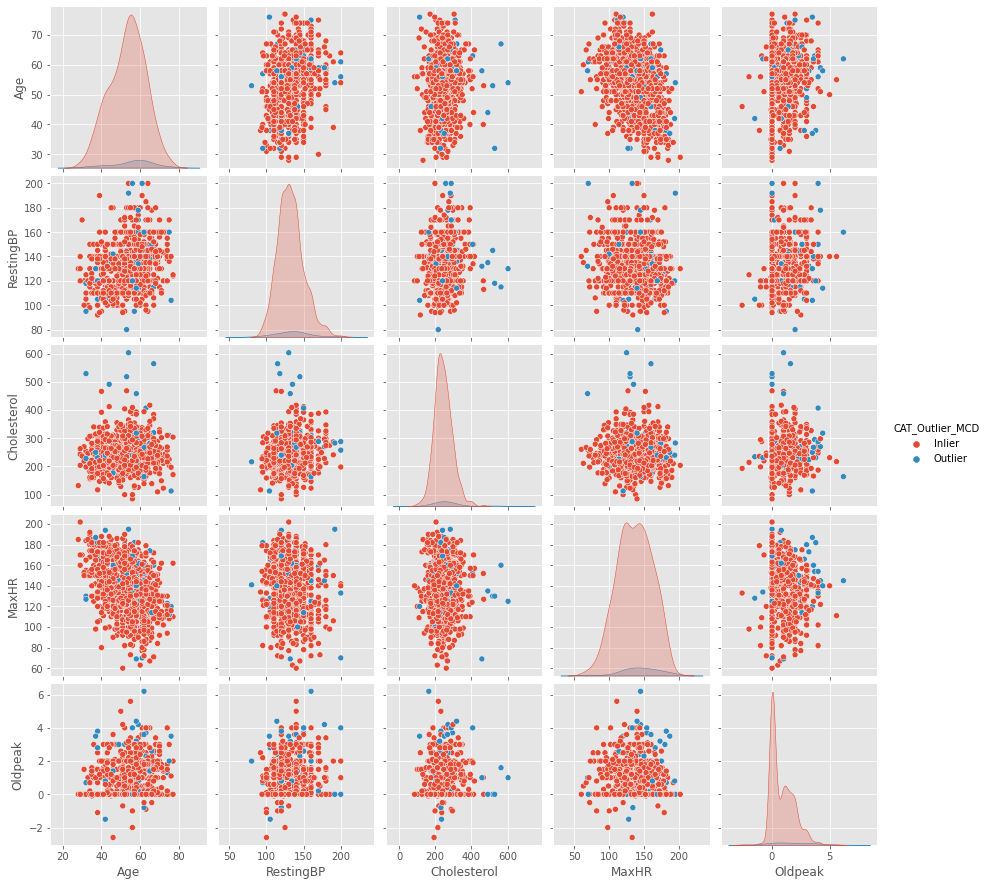

In [24]:
# Matriz de dispersión entre variables seleccionadas
select_vars_num = ['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak','CAT_Outlier_MCD']
sns.pairplot(data = df_MCD[select_vars_num], hue = "CAT_Outlier_MCD")

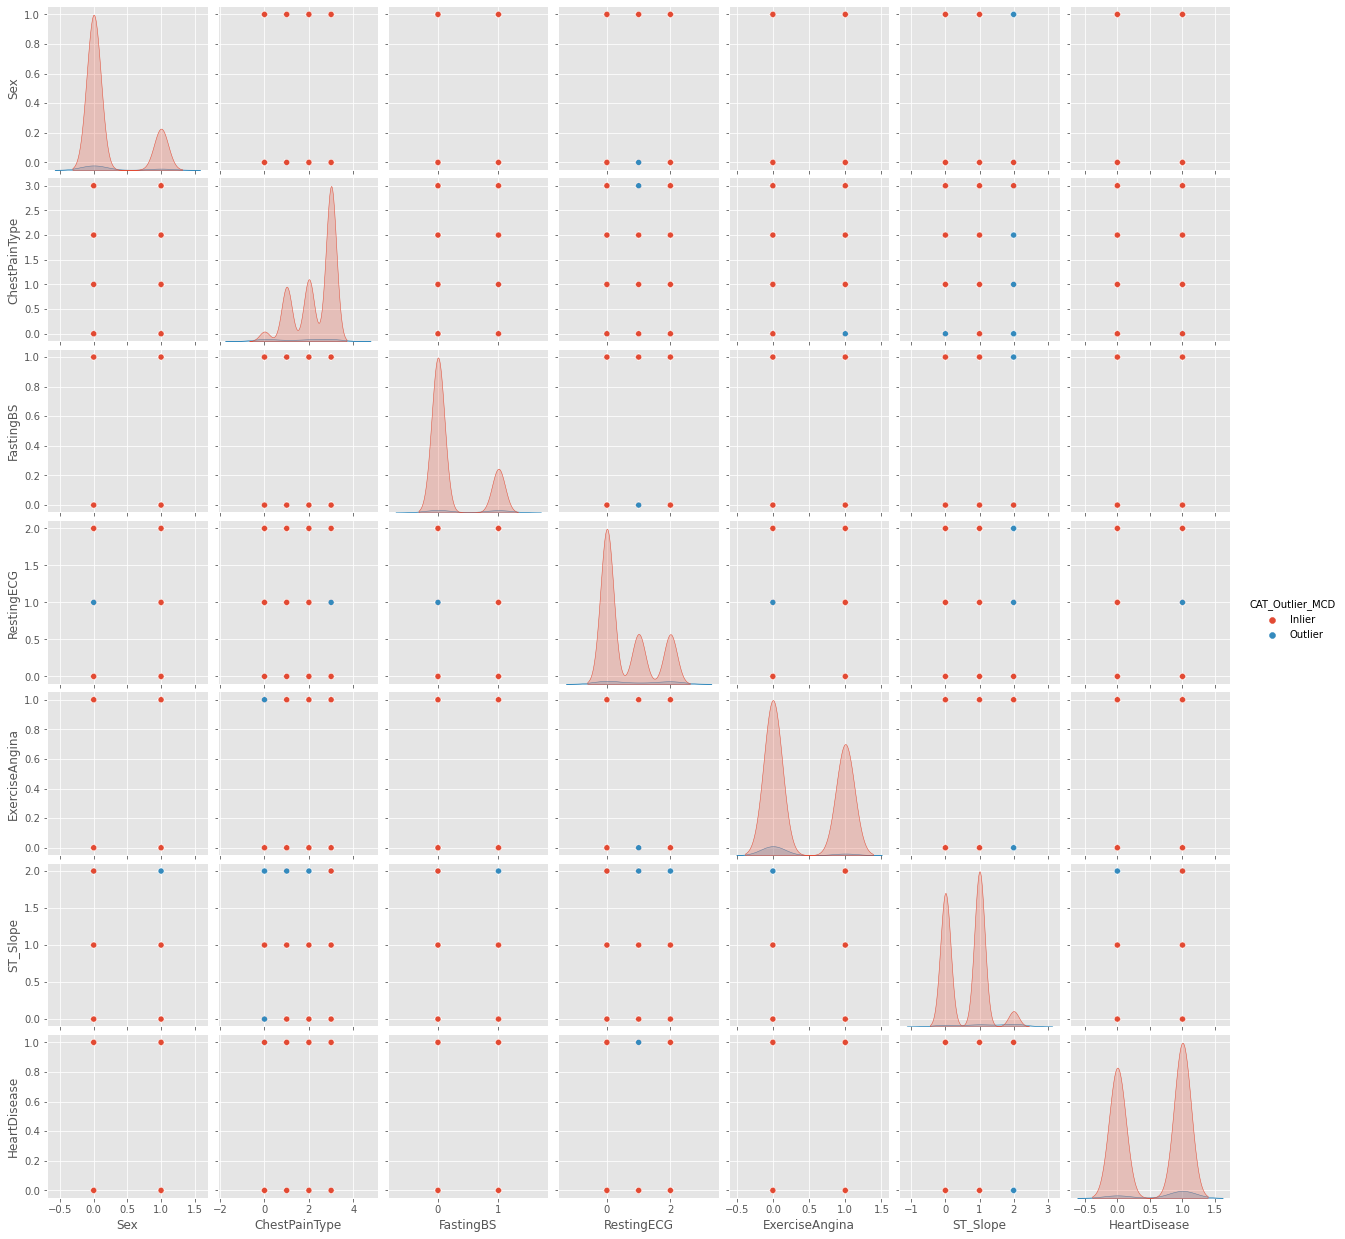

In [25]:
# Matriz de dispersión entre variables seleccionadas
select_vars_cat = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease', 'CAT_Outlier_MCD']
sns.pairplot(data = df_MCD[select_vars_cat], hue = "CAT_Outlier_MCD")

Filtraremos los datos por inliers.

In [26]:
# Selección de Inliers
df_inliers = df_MCD.loc[df_MCD['Outlier_Det'] == 0, :]
df_inliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Outlier_Det,CAT_Outlier_MCD
0,40,0,1,140.0,289.0,0,0,172,0,0.0,0,0,0,Inlier
1,49,1,2,160.0,180.0,0,0,156,0,1.0,1,1,0,Inlier
2,37,0,1,130.0,283.0,0,1,98,0,0.0,0,0,0,Inlier
3,48,1,3,138.0,214.0,0,0,108,1,1.5,1,1,0,Inlier
4,54,0,2,150.0,195.0,0,0,122,0,0.0,0,0,0,Inlier


Creamos una función que nos genere histogramas de comparación de la distribución de las variables en RawData y en el dataframe de Inliers. 

In [27]:
def HistRawInlier(df_raw,df_inlier, select_columns):
    
    """"
    Función que genera histogramas de comparación de la distribución de las variables entre dos bases de datos
    
    Parámetros:
        df_raw: DataFrame de datos crudos
        df_inlier: DataFrame con inliers
        select_columns: columnas que se desean comparar

    """
    
    # Distribuciones entre variables: Datos crudos e inliers
    fig_hist, axs_hist = plt.subplots(nrows = len(select_columns), ncols = 1,figsize = (24,12))
    axs_hist[0].set_title('Distribuciones de Variables: Raw Data vs inliers', fontsize = 18)
    
    for i, var in enumerate(select_columns):
        sns.histplot(df_raw, x = var, label = var, ax = axs_hist[i], color= 'r')
        sns.histplot(df_inlier, x = var, label = var+ " "+'inliers', ax = axs_hist[i], color=  'b')
        axs_hist[i].set_xticklabels(())
        axs_hist[i].legend(loc = 'upper right')
        axs_hist[i].set_xlabel(None)


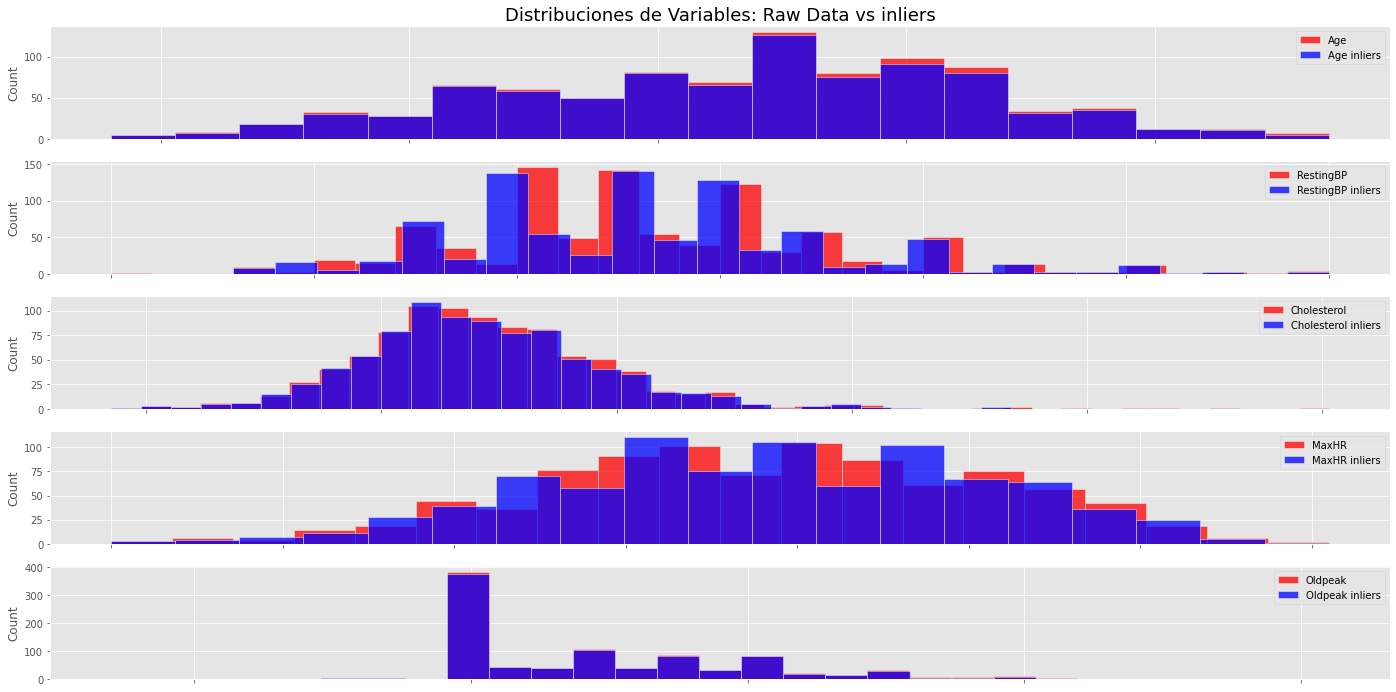

In [28]:
#Función evaluada para variables de list_vars_num
HistRawInlier(df_MCD,df_inliers,list_vars_num)

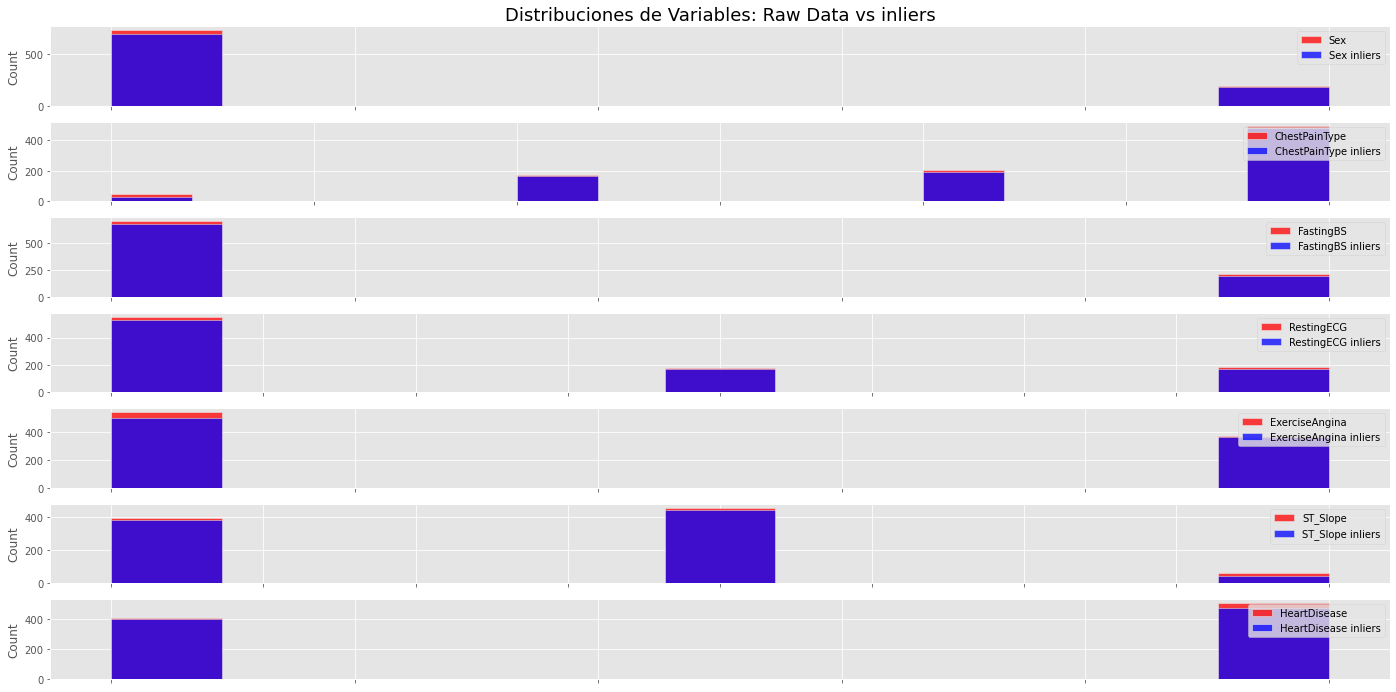

In [29]:
#Función evaluada para variables de list_vars_cat
HistRawInlier(df_MCD,df_inliers,list_vars_cat)

## Pruebas de Modelos de Entrenamiento

Generaremos funciones que nos ayuden a crear modelos de entrenamiento para detección de insuficiencia cardiaca en pacientes con base en la variable `HeartDisease`.

In [30]:
def trainAndValidate(clf, X, Y, testSize):
    """
        Esta función entrena un modeloe imprime las métricas de 
        validación.
        
        Parámetros
        ----------
        clf: Un modelo de clasificación de sklearn
        X: Matriz de características (Arreglo de Numpy)
        Y: Vector columna que contiene la clasificación asignada a cada renglon de la matriz X (Arreglo de Numpy)
        testSize: Porcentaje del conjunto de datos que se utilizará como conjunto de prueba
        
        Regresa
        --------
        clf: El modelo de clasificación entrenado
    """
    
    # La variable categórica se codifica para que los algoritmos de clasificación puedan
    # manejarla
    le = LabelEncoder()
    Y = le.fit_transform(Y)
    # le.inverse_transform([0,1,2]) # <--- Con esta instrucción puedes imprimir a qué clase corresponde cada número asignado
    
    # Se obtienen aleatoriamente los conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testSize, random_state=1)
    
    # Se estandarizan las matrices de características
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Se entrena el modelo con los datos de entrenammiento
    clf.fit(X_train, y_train)
    
    # Se predicen los resultados para el conjunto de prueba
    y_pred = clf.predict(X_test)
    
    # Se obtiene el reporte de la clasificación
    report = classification_report(y_test, y_pred)
    
    # Se obtiene la precisión general del modelo
    accuracy = accuracy_score(y_test, y_pred)
    
    # Se imprimen las métricas
    print(report)
    print(accuracy)
    
    # Se regresa el clasificador ya entrenado
    return clf

### Entrenamiento de una máquina de vectores de soporte sobre el conjunto de datos 

In [31]:
#Entrenamiento con Support Vector Classification
clf = svm.SVC()

# Se obtiene la matriz de características y el vector de clasificaciones
# como arreglos de numpy
X = df_inliers.iloc[:,:11].values
Y = df_inliers.iloc[:,11].values

# Se llama a la función para entrenar
clf_trained = trainAndValidate(clf, X, Y, .2)


              precision    recall  f1-score   support

           0       0.87      0.82      0.85        73
           1       0.88      0.91      0.89       102

    accuracy                           0.87       175
   macro avg       0.87      0.87      0.87       175
weighted avg       0.87      0.87      0.87       175

0.8742857142857143


### K fold cross validation con una regresión logística sobre el conjunto de datos

In [32]:

def kFoldCrossValidation(clf, k, X, Y):
    """
        Esta función realiza una validación cruzada con k folds.
        
        Parámetros
        ----------
        clf: Un modelo de clasificación de sklearn
        k: Número de folds/particiones a realizar en el conjunto de datos
        X: Matriz de características como arreglo de numpy
        Y: Vector de clasificaciones como arreglo de numpy
        
    """
    # Se codifica la variable categórica
    le = LabelEncoder()
    Y = le.fit_transform(Y)
    
    # Se estandariza la matriz de características
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    # Se crean las particiones del conjunto de datos
    cv = KFold(n_splits=k, random_state=1, shuffle=True)
    # Se realiza el entrenamiento y prueba con las k particiones
    scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Se imprime el accuracy promedio y la desviación estándar
    print(f"Accuracy: {scores.mean()}\nStd: {scores.std()}")

In [33]:
 
X = df_inliers.iloc[:,:11].values
Y = df_inliers.iloc[:,11].values
k = 15
clf = LogisticRegression()
kFoldCrossValidation(clf, k, X, Y)

Accuracy: 0.8727255016559518
Std: 0.030618684731751607


Podemos concluír que para el modelo de entrenamiento de una máquina de vectores de soporte se obtiene un **accuracy del 87.42%** y utilizando el modelo de K fold cross validation con regresión logística se obtiene un **accuracy del 87.27%** para predicción de una posible enfermedad cardiaca. 